In [ ]:
import csv
import datetime
f = open("guns.csv")
data = list(csv.reader(f))

In [2]:
headers = data[0]
data = data[1:]
print(headers)
print(data[0:5])

['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']
[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


In [3]:
years = [y[1] for y in data]
year_count={}
for y in years:
    if y in year_count:
        year_count[y] = year_count[y] + 1
    else:
        year_count[y] = 1
print(year_count)

{'2012': 33563, '2014': 33599, '2013': 33636}


In [4]:
dates = [datetime.datetime(year=int(y[1]),month=int(y[2]),day=1) for y in data]
date_counts = {}
for d in dates:
    if d in date_counts:
        date_counts[d] = date_counts[d] + 1
    else:
        date_counts[d] = 1
print(date_counts)

{datetime.datetime(2013, 6, 1, 0, 0): 2920, datetime.datetime(2012, 2, 1, 0, 0): 2357, datetime.datetime(2013, 8, 1, 0, 0): 2859, datetime.datetime(2013, 2, 1, 0, 0): 2375, datetime.datetime(2014, 12, 1, 0, 0): 2857, datetime.datetime(2014, 1, 1, 0, 0): 2651, datetime.datetime(2014, 2, 1, 0, 0): 2361, datetime.datetime(2012, 10, 1, 0, 0): 2733, datetime.datetime(2014, 4, 1, 0, 0): 2862, datetime.datetime(2014, 10, 1, 0, 0): 2865, datetime.datetime(2012, 12, 1, 0, 0): 2791, datetime.datetime(2013, 9, 1, 0, 0): 2742, datetime.datetime(2012, 11, 1, 0, 0): 2729, datetime.datetime(2014, 3, 1, 0, 0): 2684, datetime.datetime(2012, 4, 1, 0, 0): 2795, datetime.datetime(2012, 7, 1, 0, 0): 3026, datetime.datetime(2013, 3, 1, 0, 0): 2862, datetime.datetime(2012, 1, 1, 0, 0): 2758, datetime.datetime(2014, 9, 1, 0, 0): 2914, datetime.datetime(2014, 6, 1, 0, 0): 2931, datetime.datetime(2013, 7, 1, 0, 0): 3079, datetime.datetime(2012, 5, 1, 0, 0): 2999, datetime.datetime(2014, 8, 1, 0, 0): 2970, datet

In [5]:
sex_counts = {}
race_counts = {}
for d in data:
    if d[5] in sex_counts:
        sex_counts[d[5]] = sex_counts[d[5]] + 1
    else:
        sex_counts[d[5]] = 1
    if d[7] in race_counts:
        race_counts[d[7]] = race_counts[d[7]] + 1
    else:
        race_counts[d[7]] = 1
print(sex_counts)
print(race_counts)

{'M': 86349, 'F': 14449}
{'Hispanic': 9022, 'Black': 23296, 'Native American/Native Alaskan': 917, 'Asian/Pacific Islander': 1326, 'White': 66237}


# Predictions on US gun death rate
From the above analysis it is clear that GUN death rate is higher in particular race. To predict this reason education and their demographic region has to be explored

In [6]:
import csv
pointer = open("census.csv")
census = list(csv.reader(pointer))
census

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

In [7]:
mapping = {}
mapping['White'] = int(census[1][10])
mapping['Hispanic']=int(census[1][11])
mapping['Black']=int(census[1][12])
mapping['Native American/Native Alaskan']=int(census[1][13])
mapping['Asian/Pacific Islander']=int(census[1][14]) + int(census[1][15])
mapping

{'Asian/Pacific Islander': 15834141,
 'Black': 40250635,
 'Hispanic': 44618105,
 'Native American/Native Alaskan': 3739506,
 'White': 197318956}

In [8]:
race_per_hundredk = {}
for r in race_counts.keys():
    if r in mapping:
        race_per_hundredk[r] = (race_counts[r]/mapping[r])*100000
print(race_per_hundredk)

{'Hispanic': 20.220491210910907, 'White': 33.56849303419181, 'Native American/Native Alaskan': 24.521955573811088, 'Black': 57.8773477735196, 'Asian/Pacific Islander': 8.374309664161762}


In [9]:
intents = [d[3] for d in data]
races = [d[7] for d in data]
homicide_race_per_hundredk = {}
for i,r in enumerate(races):
    if intents[i] == 'Homicide':
        homicide_race_per_hundredk[r] += 1
    else:
        homicide_race_per_hundredk[r] = 1
homicide_race_per_hundredk

{'Asian/Pacific Islander': 2,
 'Black': 20,
 'Hispanic': 2,
 'Native American/Native Alaskan': 1,
 'White': 2}

In [10]:
homicide = {}
for h in homicide_race_per_hundredk.keys():
    if h in mapping:
        homicide[h] = (homicide_race_per_hundredk[h]/mapping[h])*100000
print(homicide)

{'Hispanic': 0.004482485305012393, 'White': 0.0010135873615710798, 'Native American/Native Alaskan': 0.026741500080491917, 'Black': 0.04968865708578262, 'Asian/Pacific Islander': 0.01263093463674474}


# Further progress on  data
Further analysis can be continued based on the education and demo

In [12]:
def refine_education():
    for row in data:
        try:
            row[10] = int(row[10])
        except Exception as excep:
            row[10] = -1
refine_education()
print(data[0:10])

[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', 4], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', 3], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', 4], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', 4], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', 2], ['6', '2012', '02', 'Suicide', '0', 'M', '17', 'Native American/Native Alaskan', '100', 'Home', 1], ['7', '2012', '02', 'Undetermined', '0', 'M', '48', 'White', '100', 'Home', 2], ['8', '2012', '03', 'Suicide', '0', 'M', '41', 'Native American/Native Alaskan', '100', 'Home', 2], ['9', '2012', '02', 'Accidental', '0', 'M', '50', 'White', '100', 'Other specified', 3], ['10', '2012', '02', 'Suicide', '0', 'M', 'NA', 'Black', '998', 'Home', 5]]


10
{'Home': 258, 'Residential institution': 1, 'Trade/service area': 19, 'Farm': 1, 'Other unspecified': 23, 'School/instiution': 5, 'Street': 24, 'Other specified': 64, 'NA': 4, 'Sports': 1}


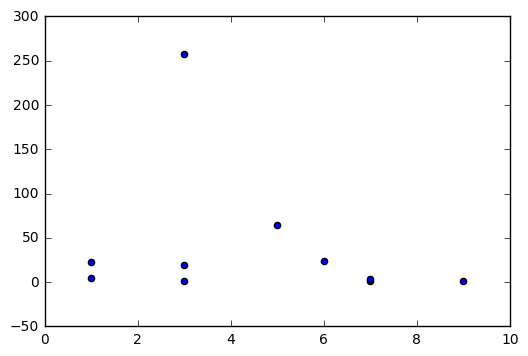

In [46]:
import matplotlib.pyplot as plt
import numpy as np
def calculate_literacy_rate(edu_level,race):
    education = {}
    for row in data:
        if row[10] == edu_level and row[7]==race:
            if row[9] in education:
                education[row[9]] = education[row[9]] + 1
            else:
                education[row[9]] = 1
    print(len(education))
    return education
ret_data = calculate_literacy_rate(4,'Hispanic')
x_axis = list(np.random.randint(1,len(ret_data),len(ret_data)))
y_axis = list(ret_data.values())
print(ret_data)
plt.scatter(x_axis,y_axis)
plt.show()

# cal_death_rate is used to calculate the no of death rate based on year,intent,race

In [59]:
def cal_death_rate(intent,race,year):
    formatted_data = []
    for row in data:
        if row[1] == year and row[3]== intent and row[7] == race:
            formatted_data.append(row)
    return formatted_data

In [36]:
pd.DataFrame?

In [62]:
import pandas as pd
my_data = cal_death_rate('Suicide','Black','2012')
my_series = pd.DataFrame(my_data)
homi_white_100k = (len(my_data)/mapping['Black'])*100000
len(my_data),homi_white_100k

(1128, 2.8024402596381397)

# on the overall analysis it is clear that black race has encountered more death rate from 2012 to 2014